In [1]:
import pandas as pd

ratings = pd.read_csv(
    "ml-100k/u.data",
    sep="\t",
    names=["user_id", "movie_id", "rating", "timestamp"]
)
ratings.head()


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [2]:
movies = pd.read_csv(
    "ml-100k/u.item",
    sep="|",
    encoding="latin-1",
    names=[
        "movie_id", "title", "release_date", "video_release_date", "imdb_url",
        "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy",
        "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
        "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"
    ]
)
movies.head()


,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
df = pd.merge(ratings, movies[['movie_id', 'title']], on='movie_id')
df.head()


,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


Matplotlib is building the font cache; this may take a moment.


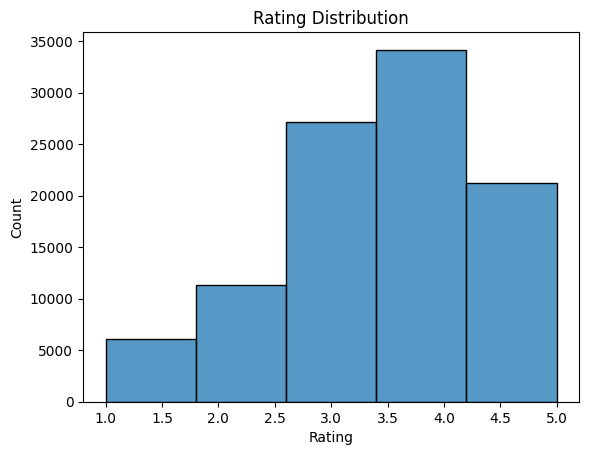

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['rating'], bins=5, kde=False)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


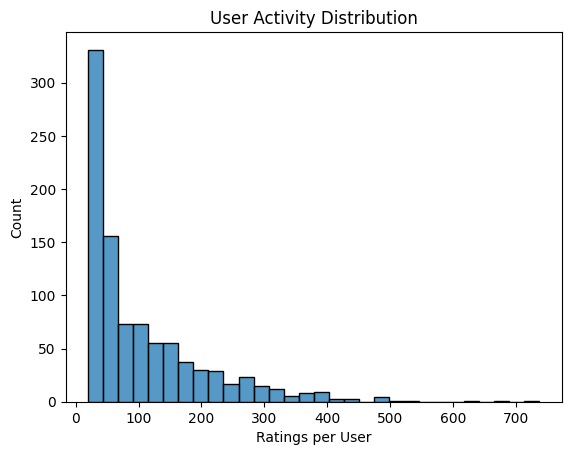

In [5]:
user_activity = df.groupby('user_id')['rating'].count()
sns.histplot(user_activity, bins=30)
plt.title("User Activity Distribution")
plt.xlabel("Ratings per User")
plt.ylabel("Count")
plt.show()


In [ ]:
popular_movies = df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
print(popular_movies)


title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64


In [7]:
rating_matrix = df.pivot_table(index='user_id', columns='title', values='rating')
rating_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [8]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 用 0 替换 NaN 计算相似度
user_matrix = rating_matrix.fillna(0)

# 计算用户-用户相似度矩阵
user_similarity = cosine_similarity(user_matrix)
user_similarity = pd.DataFrame(user_similarity, index=rating_matrix.index, columns=rating_matrix.index)

user_similarity.head()


user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.168937,0.048388,0.064561,0.379670,0.429682,0.443097,0.320079,0.078385,0.377733,...,0.372213,0.119860,0.269860,0.193343,0.197949,0.118722,0.315064,0.149086,0.181612,0.399432
2,0.168937,1.000000,0.113393,0.179694,0.073623,0.242106,0.108604,0.104257,0.162470,0.161273,...,0.147095,0.310661,0.363328,0.410725,0.322713,0.231096,0.228793,0.162911,0.175273,0.106732
3,0.048388,0.113393,1.000000,0.349781,0.021592,0.074018,0.067423,0.084419,0.062039,0.066217,...,0.033885,0.043453,0.167140,0.071288,0.126278,0.026758,0.164539,0.102899,0.136757,0.026990
4,0.064561,0.179694,0.349781,1.000000,0.031804,0.068431,0.091507,0.188060,0.101284,0.060859,...,0.054615,0.036784,0.133619,0.196561,0.146058,0.030202,0.196858,0.152041,0.171538,0.058752
5,0.379670,0.073623,0.021592,0.031804,1.000000,0.238636,0.374733,0.248930,0.056847,0.201427,...,0.340183,0.080580,0.095284,0.081053,0.148607,0.071612,0.239955,0.139595,0.153799,0.313941


In [9]:
target_user = 1
top_users = user_similarity[target_user].sort_values(ascending=False)[1:6]
print(top_users)


user_id
916    0.566293
864    0.549277
457    0.541364
92     0.539415
268    0.538883
Name: 1, dtype: float64


In [13]:
# 权重相似度的加权平均
def predict_ratings(user_id, rating_matrix, user_similarity):
    sim_scores = user_similarity[user_id]
    user_ratings = rating_matrix.loc[user_id]
    
    # 未评分的电影
    unrated_movies = user_ratings[user_ratings.isna()].index
    
    pred_ratings = {}
    for movie in unrated_movies:
        # 取其他用户对该电影的评分
        other_ratings = rating_matrix[movie]
        
        # 计算加权平均（忽略NaN）
        mask = ~other_ratings.isna()
        if mask.sum() == 0:
            continue
        pred = np.dot(sim_scores[mask], other_ratings[mask]) / sim_scores[mask].sum()
        pred_ratings[movie] = pred
    return pd.Series(pred_ratings).sort_values(ascending=False)

# 给用户1推荐电影
predicted_ratings = predict_ratings(4, rating_matrix, user_similarity)
predicted_ratings.head(20)

Prefontaine (1997)                                        5.000000
Great Day in Harlem, A (1994)                             5.000000
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Saint of Fort Washington, The (1993)                      5.000000
Aiqing wansui (1994)                                      5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Santa with Muscles (1996)                                 5.000000
Everest (1998)                                            4.628594
Pather Panchali (1955)                                    4.543544
Shawshank Redemption, The (1994)                          4.515101
Wallace & Gromit: The Best of Aardman Animation (1996)    4.501350
Leading Man, The (1996)                                   4.49